(10000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


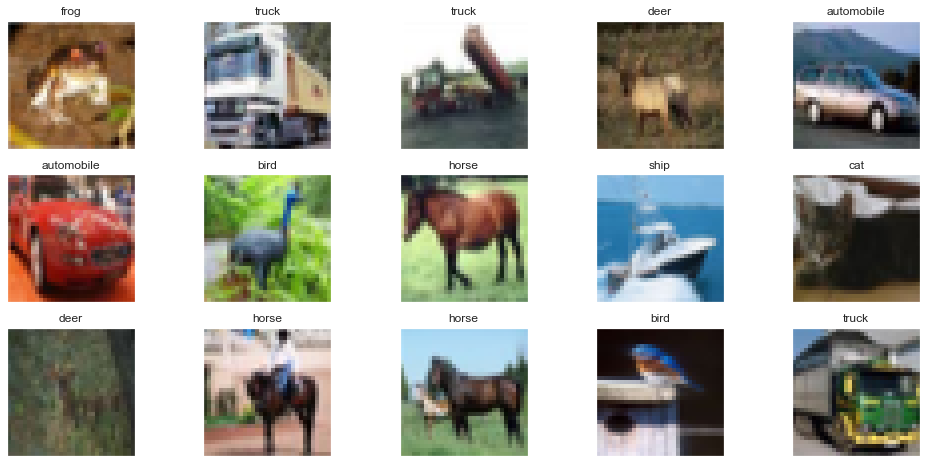

In [11]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os
from scipy import stats

import seaborn as sns; sns.set()
from skimage import data, color, feature
from keras.models import Sequential, load_model
from sklearn.svm import SVC # "Support vector classifier"
from ipywidgets import interact, fixed

## loading the CIFard10 dataset from Keras.datasets 

from keras.datasets import cifar10
datadir = os.path.dirname(os.path.abspath('/Users/oliviafeldman/Downloads/cifar-1-batches-py'))
## creating a class labels from data set 
classlabels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## laoding dataset form keras API and getting backtraining data and test data
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

xTest_gray = xTest
print(xTest_gray.shape)
#looking at the shape of the data : 

print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)
## showing images and image preprocessing 
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(5):
        axes[i,j].set_title(classlabels[yTrain[index][0]])
        axes[i,j].imshow(xTrain[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()





In [12]:
# Feature Extraction : accuracy will go down with many features so use PCA 
    #   Image Color, : color channel RBG
    #  Image SHape 
    # Gray Level 
    # histogram (texture )
# LDA: muliti linear discriminat to find optimal projection that maximizes the distance between class variance 
# PCA to reduce Dimensionality of Imaage 
# fit and build model
# classify 

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import pandas as pd



# normalize data
np.min(xTrain),np.max(xTrain) 

xTest = xTest.astype('float32')
xTrain = xTrain.astype('float32')

xTrain = xTrain/255
xTest1 = xTest/255


#resampling the data to 50000

# Shuffle first (optional)
idx = np.arange(len(xTrain))
np.random.shuffle(idx)

# get first 10% of data
x_train = xTrain[:int(.05*len(idx))]
y_train = yTrain[:int(.05*len(idx))]



## reshaping the dimnesions form 3 to 1 flattent the image 
x_train= x_train.reshape(-1,3072)
xTest = xTest1.reshape(-1,3072)
#yTest = yTest.reshape(-1,)

# looking at the reshapped images 
print(x_train.shape)
print(y_train.shape)

print(xTest.shape) 
print(yTest.shape)







(2500, 3072)
(2500, 1)
(10000, 3072)
(10000, 1)


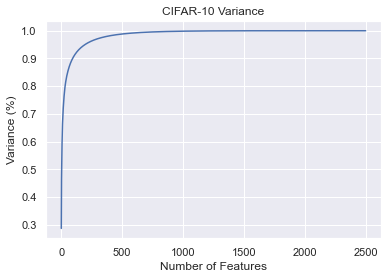

In [14]:
# using Principal Component Analysis on the data to extract image features 

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
# fitting the PCA with the training data 
pca = PCA().fit(x_train)

# looking at the number of features to variance of the dataset 
# More features leads to more variance which can lead to overfitting the data 

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('CIFAR-10 Variance')
plt.show()


#Graph shows that that at around 250 number of featrues the percentage variance stop increaseing

In [64]:
# will try variations of n_components from 200, 300, 400, and 500 
# will experi,emt with Kernel value 

In [156]:
#Aplying principal component analysis projects dimensionality down 

pca = PCA(n_components =300, svd_solver='arpack')
svc = SVC(kernel='linear', class_weight='balanced',verbose=True )

model = make_pipeline(pca, svc)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid,n_jobs=-1, verbose=20,cv=3)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

model = grid.best_estimator_



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   2

(50000, 32, 32, 1)
(10000, 32, 32, 1)


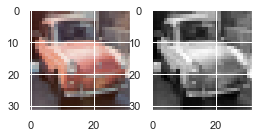

(2500, 1024)
(2500, 1024)


In [157]:
# extracting grayscale values 

def rgb2gray(data, dtype='float32'):
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst
#pixel size   
img_size = 32
#color channels 
img_channels = 3
# number of labels 
nb_classes = 10


#greyscale values for training data 
XTRAIN = rgb2gray(xTrain)
XTEST1= rgb2gray(xTest_gray)
XTEST= rgb2gray(xTest_gray)

print(XTRAIN.shape)
print(XTEST.shape)
# ploting a sample of a grey image! 
img = 64
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(xTrain[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(XTRAIN[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

# reshaping the gray scale data 
XTRAIN = XTRAIN.reshape(-1,1024)
XTEST = XTEST.reshape(-1,1024)

XTRAIN = XTRAIN[:2500]
XTEST = XTEST[:2500]
print(XTRAIN.shape)
print(XTEST.shape)

In [158]:
#Experimenting with Feature extraction 
import skimage
from skimage import data, color, feature
import numpy as np
import cv2
from tqdm import tqdm 


# Using Hog Feature Extraction 
def hogExtraction(img, vis=False):

    return feature.hog(img,orientations=9,pixels_per_cell= [8,8],cells_per_block=[2,2],block_norm = 'L2-Hys')


# getting new got training features 
x_train_hogFeatures  = np.array([feature.hog(xTrain[i]) for i in range(2500)])
x1Test_hogFeatures = np.array([feature.hog(XTEST1[i]) for i in range(2500)])
#yTest = np.array([yTest[i][0] for i in range (2500)])

#x_test_hogFeatures = x_test_hogFeatures.reshape(-1,324)
print(x_train_hogFeatures.shape)
print(x1Test_hogFeatures  )



#using daisy feature extraction 
def daisy_extract(img):
    for img in tqdm(img):
        gray_scale = rgb2gray(img)
        diasy_features = feature.daisy(gray_scale,step=4,radius=9).reshape(-1,1)
        features_vec.append(diasy_features)
    return daisy_extract



# creating new training features with feature selection but this did not give me good accuracy
temp1 = np.concatenate( (XTRAIN,x_train_hogFeatures), axis=1)
temp2=  np.concatenate((XTEST, x1Test), axis=1)
# reshaping the y training data to remove labels 
y_train = y_train.reshape(-1)


(2500, 324)
[[0.0538976  0.03915384 0.0031124  ... 0.0213406  0.00678397 0.02570893]
 [0.00836491 0.00160392 0.         ... 0.         0.         0.02315985]
 [0.22245987 0.03340728 0.01589365 ... 0.00597662 0.0002792  0.01215733]
 ...
 [0.00715691 0.00805921 0.01263987 ... 0.0161258  0.01108462 0.02697474]
 [0.09105581 0.01647756 0.03179801 ... 0.07266007 0.09211587 0.10860279]
 [0.06129511 0.01680555 0.01062648 ... 0.         0.         0.01944409]]


In [159]:
# accuracy with just hog features and grayscale 
model.fit(temp1, y_train)
y2fit = model.predict(temp2)
np.shape(model)
svc_pca_accuracy1 = metrics.accuracy_score(y1Test,y2fit)
print(svc_pca_accuracy1)

[LibSVM]0.1752


In [160]:
print ('accuracy with just hog features and grayscale :')
print(svc_pca_accuracy1)

accuracy with just hog features and grayscale :
0.1752


In [161]:
#print(yfit.shape)
y1Test = yTest[:2500]
print(y1Test.shape)

(2500, 1)


In [162]:

from sklearn import metrics

## using just teh hog feature extraction to test the accuracy of the classifier 
model.fit(x_train_hogFeatures, y_train)
y1fit = model.predict(x1Test_hogFeatures)
np.shape(model)
svc_pca_accuracy2 = metrics.accuracy_score(y1Test,y1fit)


[LibSVM]

In [163]:
print('accuracy with just hog features:')
print(svc_pca_accuracy2)


accuracy with just hog features:
0.4584
